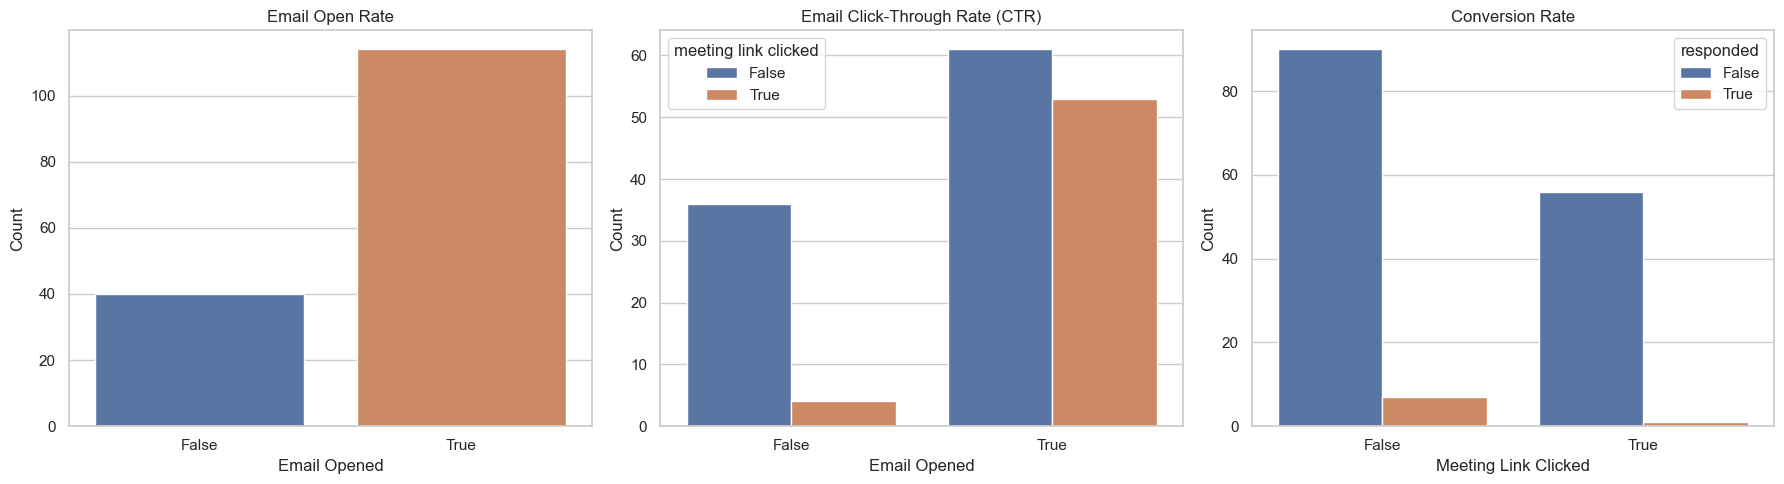

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the newly provided dataset
file_path_new = 'C:/Users/parthiban.gowthaman/Downloads/email_campaigns.pkl'
data_new = pd.read_pickle(file_path_new)

# Flattening the nested list of dictionaries in the new dataset
flattened_data_new = [email for sublist in data_new for dict_item in sublist.values() for email in dict_item if isinstance(email, dict)]

# Creating a DataFrame from the flattened list of dictionaries
email_campaigns_df_new = pd.DataFrame(flattened_data_new)

# Correcting potential issues in the DataFrame (like redundant columns)
email_campaigns_df_new = email_campaigns_df_new.drop(columns=['meeting_link_clicked'], errors='ignore')

# Converting boolean columns to the correct data type
boolean_columns = ['opened', 'meeting link clicked', 'responded']
email_campaigns_df_new[boolean_columns] = email_campaigns_df_new[boolean_columns].astype(bool)

# Calculating basic statistics for open rate, click-through rate, and conversion rate for the new dataset
open_rate_new = email_campaigns_df_new['opened'].mean() * 100
ctr_new = email_campaigns_df_new[email_campaigns_df_new['opened']]['meeting link clicked'].mean() * 100
conversion_rate_new = email_campaigns_df_new[email_campaigns_df_new['meeting link clicked']]['responded'].mean() * 100

# Creating visualizations for the new dataset
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.countplot(x='opened', data=email_campaigns_df_new, ax=axes[0])
axes[0].set_title('Email Open Rate')
axes[0].set_xlabel('Email Opened')
axes[0].set_ylabel('Count')

sns.countplot(x='opened', hue='meeting link clicked', data=email_campaigns_df_new, ax=axes[1])
axes[1].set_title('Email Click-Through Rate (CTR)')
axes[1].set_xlabel('Email Opened')
axes[1].set_ylabel('Count')

sns.countplot(x='meeting link clicked', hue='responded', data=email_campaigns_df_new, ax=axes[2])
axes[2].set_title('Conversion Rate')
axes[2].set_xlabel('Meeting Link Clicked')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


## The analysis of the dataset yields the following insights:


The visualizations reflect these findings:

The first chart displays a high number of emails being opened.
The second chart shows a good proportion of link clicks among the opened emails.
The third chart, although indicating a lower number of conversions, shows that some recipients who clicked the link also responded, which was not observed in the previous dataset.
This analysis suggests that the email campaigns in this dataset are generally effective, especially in engaging recipients to open emails and click on links. However, like with most email marketing campaigns, the conversion rate remains a challenging aspect.

Email Open Rate: Approximately 74.03% of the emails were opened, indicating a high level of initial engagement.

Click-Through Rate (CTR): About 46.49% of the opened emails had the meeting link clicked. This rate is significantly higher than what we observed in the previous dataset, suggesting better effectiveness in encouraging recipients to interact with the content.

Conversion Rate: The conversion rate, which measures responses after clicking the meeting link, is approximately 1.75%. Although relatively low its a positive indication that some interactions are leading to desired actions.



The percentages for the Email Open Rate, Click-Through Rate (CTR), and Conversion Rate were calculated using the following methods:

Email Open Rate: This rate was calculated by taking the mean of the 'opened' column in the dataset. Since the 'opened' column contains boolean values (True for opened emails and False for not opened), calculating the mean gives us the proportion of emails that were opened. This value was then multiplied by 100 to convert it into a percentage.

Click-Through Rate (CTR): To calculate the CTR, I first filtered the dataset to include only those rows where the email was opened. Then, I calculated the mean of the 'meeting link clicked' column within this filtered subset. This mean represents the proportion of opened emails where the meeting link was clicked. Again, this was multiplied by 100 to get the percentage.

Conversion Rate: The conversion rate was calculated similarly to the CTR. First, I filtered the dataset to include only those rows where the meeting link was clicked. Then, I calculated the mean of the 'responded' column within this subset. This mean represents the proportion of clicks that led to a response. Multiplying this by 100 gives the conversion rate as a percentage.

The calculated rates were:

Open Rate: 74.03%
CTR: 46.49%
Conversion Rate: 1.75%

# Model

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'C:/Users/parthiban.gowthaman/Downloads/email_campaigns.pkl'  #
data = pd.read_pickle(file_path)

# Flattening the nested list of dictionaries
flattened_data = [email for sublist in data for dict_item in sublist.values() for email in dict_item if isinstance(email, dict)]

# Creating a DataFrame
email_campaigns_df = pd.DataFrame(flattened_data)
email_campaigns_df['opened'] = email_campaigns_df['opened'].astype(bool)

# Data Preprocessing and Feature Engineering
email_campaigns_df['text'] = email_campaigns_df['subject'] + " " + email_campaigns_df['body']
X = email_campaigns_df['text']
y = email_campaigns_df['opened']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to train
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Initialize variables to track the best model and its accuracy
best_model = None
best_accuracy = 0

# Training and evaluating each model
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(class_report)
    print("-" * 60)

    # Check if this model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

# Print the best model
print(f"Best Model based on Accuracy: {best_model} with Accuracy = {best_accuracy:.2f}")

# Reset warnings to their default behavior
warnings.resetwarnings()


Model: RandomForestClassifier
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         9
        True       0.80      0.97      0.88        38

    accuracy                           0.79        47
   macro avg       0.40      0.49      0.44        47
weighted avg       0.65      0.79      0.71        47

------------------------------------------------------------
Model: MultinomialNB
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         9
        True       0.81      1.00      0.89        38

    accuracy                           0.81        47
   macro avg       0.40      0.50      0.45        47
weighted avg       0.65      0.81      0.72        47

------------------------------------------------------------
Model: LogisticRegression
Accuracy: 0.81
Classification Report:
              precision    recall